In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [2]:
prng = 'MT'

In [3]:
data = pd.read_csv(f'pvalues/{prng}_pvals.csv')

In [18]:
data.head()

,Unnamed: 0,Monobit,Frequency Within Blocks,Runs,Longest Run in Ones,Binary Matrix Rank,DFT,Nonoverlapping Template,Overlapping Template,Maurer's Universal,Linear Complexity
0,0,0.353439,0.120506,0.141568,0.654713,0.119437,0.245914,1.000000,0.038044,0.999350,0.123336
1,1,0.696893,0.011653,0.742072,0.967613,0.367268,0.318308,1.000001,0.683236,0.998650,0.796993
2,2,0.208644,0.791149,0.172324,0.738893,0.164249,1.093378,1.000001,0.280502,0.999365,0.971846
3,3,0.524745,0.131899,0.917092,0.187030,0.619952,2.179289,1.000001,0.550278,0.999206,0.798541
4,4,0.173251,0.388665,0.270341,0.248759,0.713234,0.245914,0.999880,0.119113,0.998926,0.262796


In [26]:
test = data['Runs']

In [3]:
def roc_curve(X):
    cnts = [0]
    X_s = sorted(X,reverse=True)
    cntr = 0
    
    rate = 99/100
    curr = 0
    
    while X_s[cntr] > rate:        
        cntr += 1
        if cntr == len(X_s):
            break
        curr += 1
        
        while X_s[cntr] <= rate:
            cnts.append(cntr)
            rate -= 1/100
            
    cnts.append(len(X_s))
            
    while len(cnts) < 101:
        cnts.append(cnts[-1])
        
    return [i/100 for i in range(100,-1,-1)], [i/cnts[-1] for i in cnts]

In [57]:
rates, cnts = roc_curve(test)

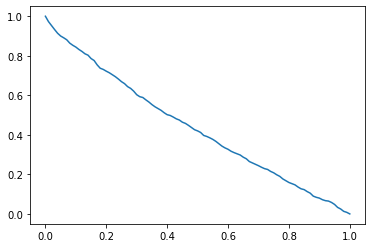

In [59]:
plt.plot(rates,cnts)

(array([156., 122., 118., 100.,  83.,  94.,  80.,  85.,  81.,  81.]),
 array([1.71564581e-04, 9.98469934e-02, 1.99522422e-01, 2.99197851e-01,
        3.98873280e-01, 4.98548709e-01, 5.98224137e-01, 6.97899566e-01,
        7.97574995e-01, 8.97250424e-01, 9.96925853e-01]),
 <a list of 10 Patch objects>)

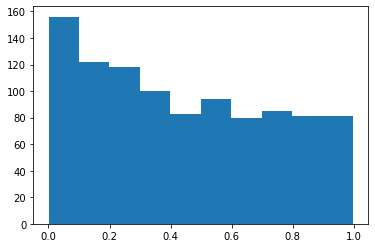

In [60]:
plt.hist(test)

In [4]:
### multiple prngs comparison

MT: [0.999], 0.994
PCG64: [0.999], 0.994
philox: [0.999], 0.994
threefry: [0.999], 0.994
xoroshiro: [0.999], 0.994


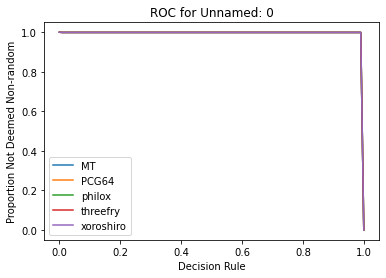

MT: [0.795], 0.487
PCG64: [0.785], 0.483
philox: [0.794], 0.505
threefry: [0.795], 0.498
xoroshiro: [0.783], 0.477


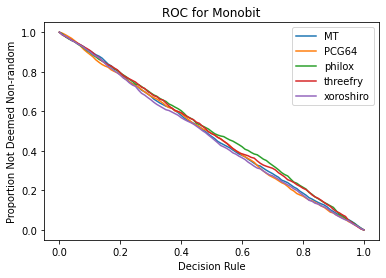

MT: [0.809], 0.511
PCG64: [0.813], 0.516
philox: [0.795], 0.505
threefry: [0.786], 0.496
xoroshiro: [0.807], 0.511


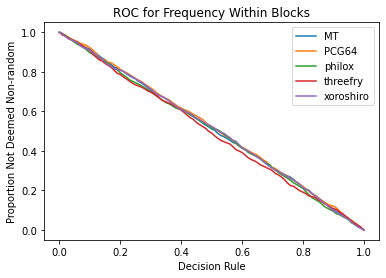

MT: [0.722], 0.440
PCG64: [0.716], 0.434
philox: [0.702], 0.435
threefry: [0.729], 0.449
xoroshiro: [0.721], 0.444


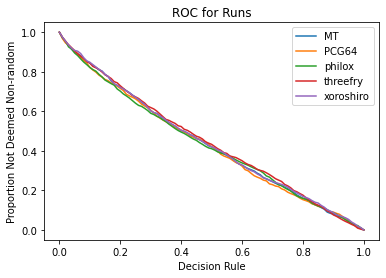

MT: [0.797], 0.493
PCG64: [0.791], 0.487
philox: [0.814], 0.501
threefry: [0.786], 0.488
xoroshiro: [0.803], 0.500


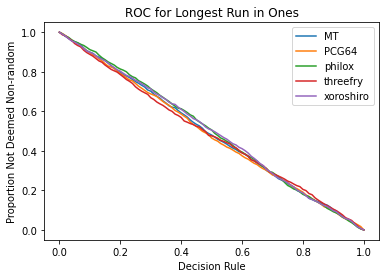

MT: [0.796], 0.505
PCG64: [0.812], 0.502
philox: [0.788], 0.486
threefry: [0.796], 0.498
xoroshiro: [0.812], 0.515


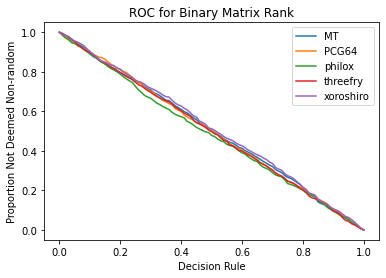

MT: [0.845], 0.626
PCG64: [0.848], 0.639
philox: [0.857], 0.649
threefry: [0.852], 0.646
xoroshiro: [0.827], 0.620


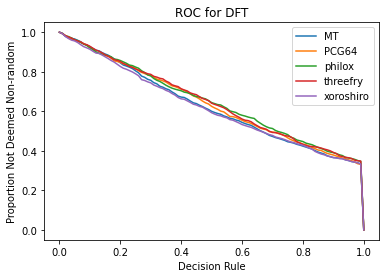

MT: [1.0], 0.995
PCG64: [1.0], 0.995
philox: [1.0], 0.995
threefry: [1.0], 0.995
xoroshiro: [1.0], 0.995


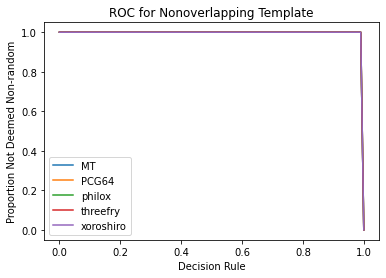

MT: [0.777], 0.490
PCG64: [0.817], 0.516
philox: [0.803], 0.502
threefry: [0.816], 0.501
xoroshiro: [0.788], 0.492


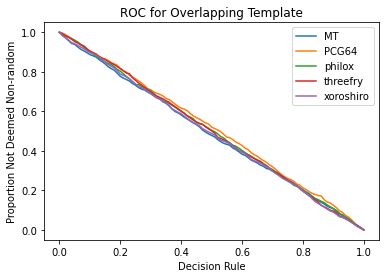

MT: [1.0], 0.995
PCG64: [1.0], 0.995
philox: [1.0], 0.995
threefry: [1.0], 0.995
xoroshiro: [1.0], 0.995


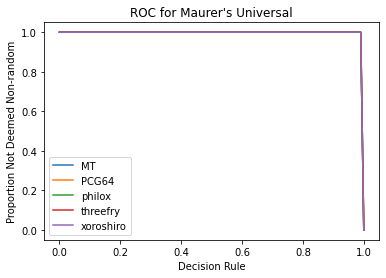

MT: [0.789], 0.503
PCG64: [0.805], 0.515
philox: [0.778], 0.496
threefry: [0.804], 0.500
xoroshiro: [0.799], 0.507


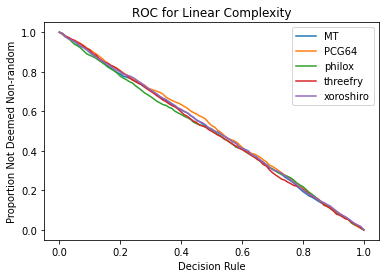

In [67]:
prngs = ['MT','PCG64','philox','threefry','xoroshiro']
dec_rules = [0.2] # [0.01,0.05,0.1,0.2,0.3,0.4,0.5]

for column in data:
    cnts_lists = [[] for prng in prngs]
    init = 0
    
    for prng in prngs:
        data = pd.read_csv(f'pvalues/{prng}_pvals.csv')
        test = data[column]

    #     # edit this to edit the test
    #     test = data['Linear Complexity']

        rates, cnts = roc_curve(test)
        cnts_lists[init] = cnts
        init += 1
#         cnts_lists.append(cnts)

    # decision rules
    for i in range(len(cnts_lists)):
        outc = []

        for j in dec_rules:
            k = 0
            while rates[k] != j:
                k += 1

            outc.append(cnts_lists[i][k])

        print(f'{prngs[i]}: {outc}, {metrics.auc(rates,cnts_lists[i]):.3f}')

    # roc curves
    plt.figure()
    for i in range(len(prngs)):
        plt.plot(rates,cnts_lists[i],label=prngs[i])
    plt.legend()
    plt.title(f'ROC for {test.name}')
    plt.xlabel('Decision Rule')
    plt.ylabel('Proportion Not Deemed Non-random')
    plt.show()

## Sample ROC curves

Text(0, 0.5, 'False Positive Rate')

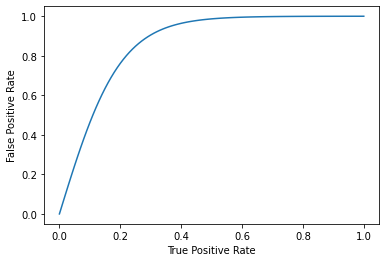

In [35]:
plt.plot([i/100 for i in range(101)],[2*(1/(1 + np.exp(-x/100))-0.5) for x in range(0,1001,10)])
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')

In [46]:
metrics.auc([i/100 for i in range(101)],[2*(1/(1 + np.exp(-x/100))-0.5) for x in range(0,1001,10)])

0.8613379810920179

Text(0, 0.5, 'False Positive Rate')

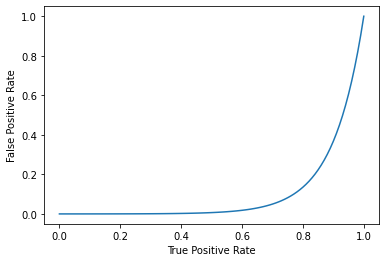

In [47]:
plt.plot([i/100 for i in range(101)],[np.exp(x/100-10) for x in range(0,1001,10)])
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')

In [48]:
metrics.auc([i/100 for i in range(101)],[np.exp(x/100-10) for x in range(0,1001,10)])

0.10007877567207718